In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Improve visuals
sns.set(style="whitegrid")

In [2]:
# If saved as donations.csv
df = pd.read_csv("donations_all_time.csv", sep=";", encoding="utf-8")
df.head()

,Názov organizácie,Interný názov kampane,Dátum pripísania daru,Meno darcu,Priezvisko darcu,Výška prijatého daru v €,Periodicita daru,VS platby,Status platby,Email darcu,Platobná brána,Platobná metóda,Anonymný darca,Názov alternatívneho odkazu,Zdroj daru,Druh darcu
0,Slovenská nadácia pre UNICEF,Gaza,26.05.2025 12:23:20,Lucia,Foltýnová,10,Jednorazová,3000689355,Úspešná,lucia.hudecova@hotmail.com,Cheddar,Platba kartou cez CardPay,Nie,NaN,Darovacia stránka,Osoba
1,Slovenská nadácia pre UNICEF,Zbierka MODRÝ GOMBÍK UNICEF 2025,26.05.2025 12:12:02,Katarína,Lalíková,12,Jednorazová,3000689353,Úspešná,katarina.lalik@gmail.com,Cheddar,Platba kartou cez CardPay,Nie,NaN,Darovacia stránka,Osoba
2,Slovenská nadácia pre UNICEF,Zbierka MODRÝ GOMBÍK UNICEF 2025,26.05.2025 12:02:46,Peter,Hlavatý,15,Jednorazová,3000689352,Úspešná,petko1852@gmail.com,Cheddar,Platba kartou cez CardPay,Nie,NaN,Darovacia stránka,Osoba
3,Slovenská nadácia pre UNICEF,Integrovane API na unicef.sk,26.05.2025 11:49:07,Lenka,Kvoriaková,20,Jednorazová,3000689344,Úspešná,ltvmtl@azet.sk,Cheddar,Platba kartou cez CardPay,Nie,NaN,Post API,Osoba
4,Slovenská nadácia pre UNICEF,Zbierka MODRÝ GOMBÍK UNICEF 2025,26.05.2025 10:29:17,Ingrid,Kádenová,10,Jednorazová,3000689322,Úspešná,i.kadenova@gmail.com,Cheddar,Platba kartou cez CardPay,Nie,NaN,Darovacia stránka,Osoba


In [12]:
# Rename columns to English for ease
df.columns = [
    "Organization", "Campaign", "DonationDate", "FirstName", "LastName",
    "AmountEUR", "Frequency", "PaymentVS", "PaymentStatus", "Email",
    "PaymentGateway", "PaymentMethod", "IsAnonymous",
    "AltLinkName", "Source", "DonorType"
]

# Convert date
df["DonationDate"] = pd.to_datetime(df["DonationDate"], format="%d.%m.%Y %H:%M:%S")

df["AmountEUR"] = pd.to_numeric(df["AmountEUR"], errors="coerce")

# Clean 'IsAnonymous' column
df["IsAnonymous"] = df["IsAnonymous"].map({"Áno": True, "Nie": False})

In [13]:
# Overview
df.info()

# Summary of numeric columns
df.describe()

# Count of donations
print("Total donations:", len(df))

# Total donation sum
print("Total amount donated (€):", df["AmountEUR"].sum())

# Unique campaigns
print("Unique campaigns:", df["Campaign"].nunique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7322 entries, 0 to 7321
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Organization    7322 non-null   object        
 1   Campaign        7322 non-null   object        
 2   DonationDate    7322 non-null   datetime64[ns]
 3   FirstName       7322 non-null   object        
 4   LastName        7322 non-null   object        
 5   AmountEUR       7268 non-null   float64       
 6   Frequency       7322 non-null   object        
 7   PaymentVS       7322 non-null   int64         
 8   PaymentStatus   7322 non-null   object        
 9   Email           7322 non-null   object        
 10  PaymentGateway  7322 non-null   object        
 11  PaymentMethod   7322 non-null   object        
 12  IsAnonymous     0 non-null      object        
 13  AltLinkName     1418 non-null   object        
 14  Source          7322 non-null   object        
 15  Dono

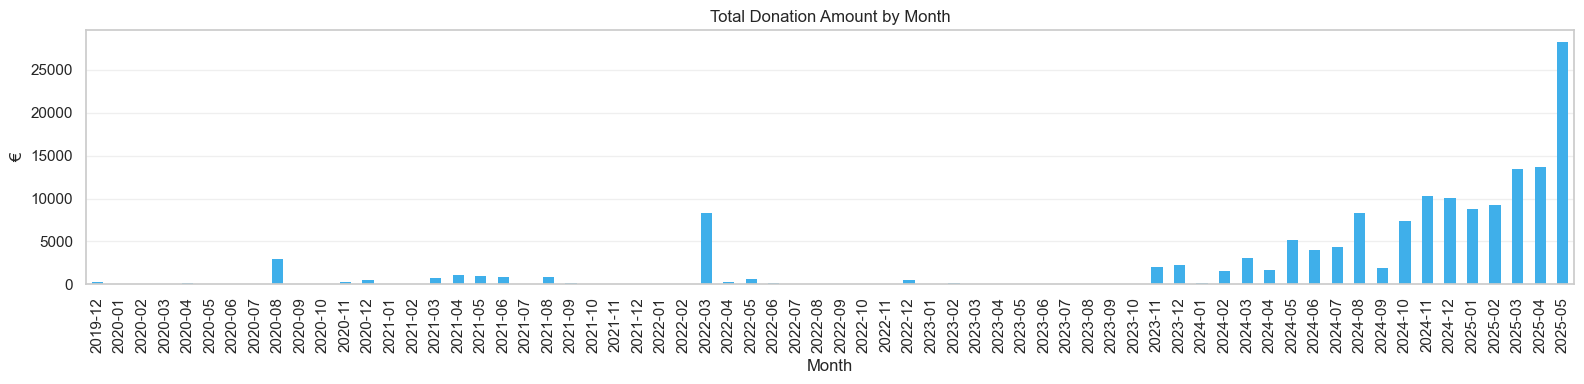

In [41]:
monthly_donations = df.set_index("DonationDate")["AmountEUR"].resample("ME").sum()

# Format index for clearer x-axis labels
monthly_donations.index = monthly_donations.index.strftime('%Y-%m')

# Create the plot
ax = monthly_donations.plot(
    kind="bar",
    figsize=(16, 4),
    color="#3FAFEA",
    edgecolor="none"  # optional: removes outlines
)

# Customize the plot
plt.title("Total Donation Amount by Month")
plt.ylabel("€")
plt.xlabel("Month")
plt.xticks(rotation=90)

# Remove vertical grid lines
ax.grid(axis='x', visible=False)
ax.grid(axis='y', alpha=0.3) 

plt.tight_layout()
plt.show()

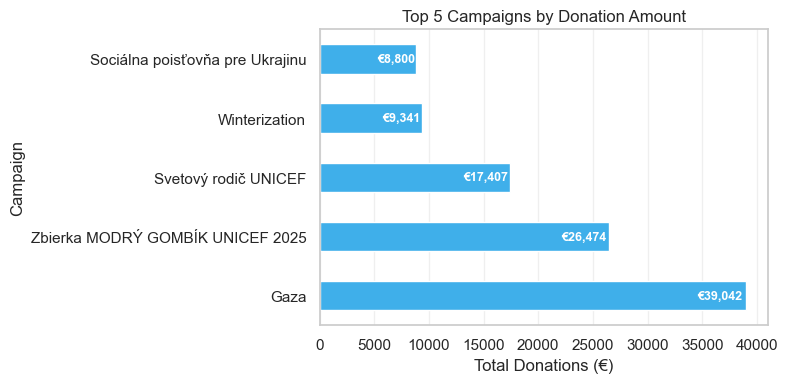

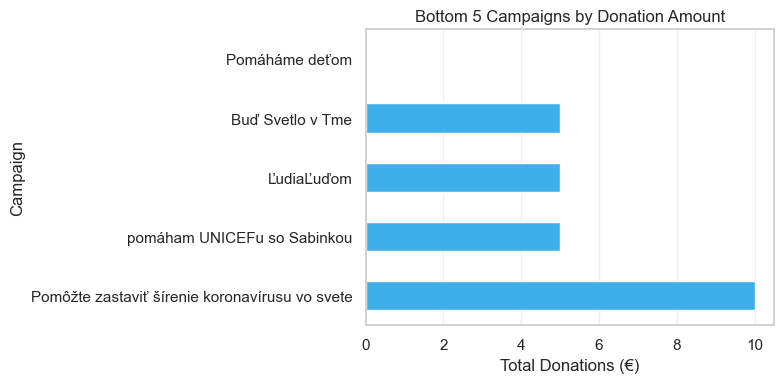

In [45]:
# Group and sort by total donation amount
campaign_totals = df.groupby("Campaign")["AmountEUR"].sum().sort_values(ascending=False)

# Top 5 campaigns
top_5 = campaign_totals.head(5)

# Bottom 5 campaigns
bottom_5 = campaign_totals.tail(5)

ax = top_5.plot(kind="barh", figsize=(8, 4), color="#3FAFEA")
# Remove vertical grid lines
ax.grid(axis='y', visible=False)
ax.grid(axis='x', alpha=0.3)
plt.xlabel("Total Donations (€)")
plt.title("Top 5 Campaigns by Donation Amount")

# Add text inside each bar
for index, value in enumerate(top_5):
    ax.text(value * 0.99, index, f"€{value:,.0f}", va='center', ha='right',
            fontsize=9, color='white', fontweight='bold')
plt.tight_layout()
plt.show()


# Plot Bottom 5
ax2 = bottom_5.plot(kind="barh", figsize=(8, 4), color="#3FAFEA")
# Remove vertical grid lines
ax2.grid(axis='y', visible=False)
ax2.grid(axis='x', alpha=0.3)
plt.xlabel("Total Donations (€)")
plt.title("Bottom 5 Campaigns by Donation Amount")
plt.tight_layout()
plt.show()


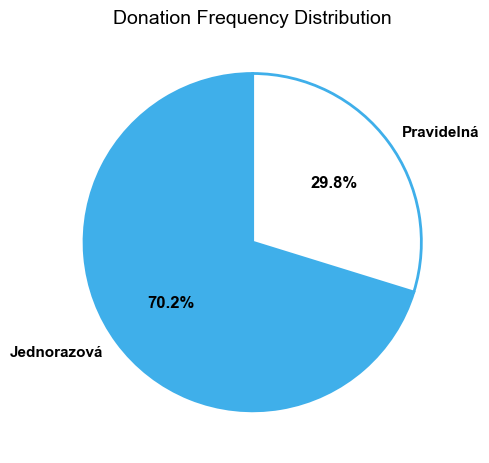

In [52]:
# Get value counts
freq_counts = df["Frequency"].value_counts()

# Define colors: first slice is blue, second is white
colors = ["#3FAFEA", "white"]

# Create pie chart
ax = freq_counts.plot(
    kind="pie",
    autopct="%1.1f%%",
    startangle=90,
    colors=colors,
    wedgeprops={"edgecolor": "#3FAFEA", "linewidth": 2}
)

# Style text labels and title with main color
plt.setp(ax.texts, color="black", fontweight="bold")
plt.title("Donation Frequency Distribution", color="black", fontsize=14)
plt.ylabel("")  # Remove y-label
plt.tight_layout()
plt.show()


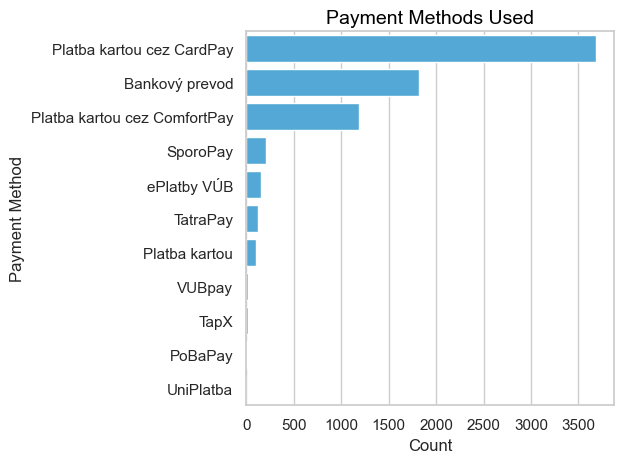

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn color palette to use the main color
sns.set_palette(["#3FAFEA"])

# Plot Payment Methods
sns.countplot(
    data=df,
    y="PaymentMethod",
    order=df["PaymentMethod"].value_counts().index
)

plt.title("Payment Methods Used", color="black", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Payment Method")
plt.tight_layout()
plt.show()

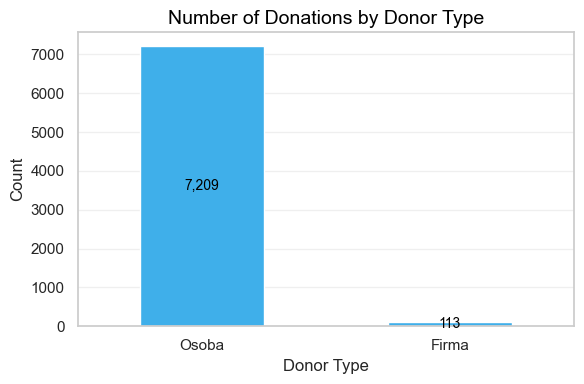

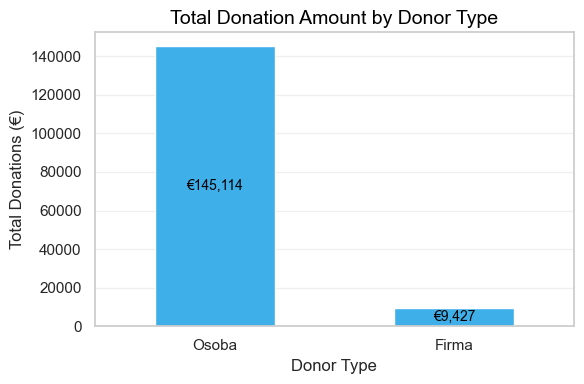

In [77]:
import matplotlib.pyplot as plt

main_color = "#3FAFEA"

# 1. Number of Donations by Donor Type
donor_counts = df["DonorType"].value_counts()

ax = donor_counts.plot(
    kind="bar",
    color=main_color,
    figsize=(6, 4)
)

# Titles and labels
ax.set_title("Number of Donations by Donor Type", color="black", fontsize=14)
ax.set_xlabel("Donor Type")
ax.set_ylabel("Count")

# Grid styling
ax.grid(axis='y', alpha=0.3)
ax.grid(axis='x', visible=False)
plt.xticks(rotation=0)

# In-bar value labels
for i, v in enumerate(donor_counts):
    ax.text(i, v / 2, f"{v:,}", color="black", ha="center", va="center", fontsize=10)

plt.tight_layout()
plt.show()

# 2. Total Donation Amount by Donor Type
donation_sums = df.groupby("DonorType")["AmountEUR"].sum().sort_values(ascending=False)

ax = donation_sums.plot(
    kind="bar",
    color=main_color,
    figsize=(6, 4)
)

ax.set_title("Total Donation Amount by Donor Type", color="black", fontsize=14)
ax.set_xlabel("Donor Type")
ax.set_ylabel("Total Donations (€)")
ax.grid(axis='y', alpha=0.3)
ax.grid(axis='x', visible=False)
plt.xticks(rotation=0)

# In-bar value labels
for i, v in enumerate(donation_sums):
    ax.text(i, v / 2, f"€{v:,.0f}", color="black", ha="center", va="center", fontsize=10)

plt.tight_layout()
plt.show()


In [79]:
# Average donation per campaign
avg_donation_per_campaign = df.groupby("Campaign")["AmountEUR"].mean()
print(avg_donation_per_campaign.sort_values(ascending=False))


Campaign
2 roky od eskalácie konfliktu na Ukrajine      54.204545
Výzva AK Schmiedlovej                          52.571429
Ježkoviny                                      52.000000
Darujte deťom vzdelanie - IBM kampaň           50.000000
Humanity outbids all.                          50.000000
                                                 ...    
ĽudiaĽuďom                                      5.000000
SENGYM pomáha                                   5.000000
Buď Svetlo v Tme                                5.000000
Zbierka MODRÝ GOMBÍK UNICEF 2025 - terminal     2.307692
Pomáháme deťom                                       NaN
Name: AmountEUR, Length: 71, dtype: float64
